In [166]:
import numpy as np
np.random.seed(101)
import requests
import time
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import re
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
import sklearn.metrics


## Overview

In [219]:
properties = pd.read_csv("/Users/nicoladisabato/Desktop/data_kaggle_SORGENTE.csv")
properties

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.00,2.00,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.00,nan,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.00,2.00,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,nan,nan,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.00,2.00,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.00,4.00,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,NaN,nan,nan,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.00,4.00,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",4+1,4.00,3.00,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3,2.00,1.00,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


In [168]:
properties.isnull().sum()

Location             0
Price              248
Rooms             1706
Bathrooms         2013
Car Parks        17567
Property Type       25
Size              1063
Furnishing        6930
dtype: int64

In [169]:
properties.count()

Location         53883
Price            53635
Rooms            52177
Bathrooms        51870
Car Parks        36316
Property Type    53858
Size             52820
Furnishing       46953
dtype: int64

## Location

In [170]:
#deleting Kuala Lumpur
properties["Location"] = properties["Location"].str.replace(r", Kuala Lumpur", "")
properties["Location"] = properties["Location"].str.lower()
properties

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,klcc,"RM 1,250,000",2+1,3.00,2.00,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,damansara heights,"RM 6,800,000",6,7.00,nan,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,dutamas,"RM 1,030,000",3,4.00,2.00,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,cheras,NaN,NaN,nan,nan,NaN,NaN,NaN
4,bukit jalil,"RM 900,000",4+1,3.00,2.00,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,taman tun dr ismail,"RM 5,350,000",4+2,5.00,4.00,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,seputeh,NaN,NaN,nan,nan,NaN,NaN,NaN
7,taman tun dr ismail,"RM 2,600,000",5,4.00,4.00,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,taman tun dr ismail,"RM 1,950,000",4+1,4.00,3.00,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,sri petaling,"RM 385,000",3,2.00,1.00,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


In [171]:
properties.count()

Location         53883
Price            53635
Rooms            52177
Bathrooms        51870
Car Parks        36316
Property Type    53858
Size             52820
Furnishing       46953
dtype: int64

In [172]:
properties['Location'].value_counts()

mont kiara                           5897
klcc                                 5230
cheras                               4533
jalan klang lama (old klang road)    2854
setapak                              2710
bukit jalil                          2593
kepong                               2270
bangsar                              1897
desa parkcity                        1530
damansara heights                    1412
dutamas                              1247
ampang                               1234
sentul                               1149
sungai besi                          1122
taman tun dr ismail                  1089
sri hartamas                         1063
taman desa                           1025
wangsa maju                           971
segambut                              898
bukit bintang                         848
kl city                               776
kuchai lama                           773
sri petaling                          727
jalan kuching                     

## Price

In [173]:
properties.loc[:,'Price'] = properties.loc[:,'Price'].str.replace(r"RM ", "")
properties.loc[:,'Price'] = properties.loc[:,'Price'].str.replace(r",", "")

properties

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,klcc,1250000,2+1,3.00,2.00,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,damansara heights,6800000,6,7.00,nan,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,dutamas,1030000,3,4.00,2.00,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,cheras,NaN,NaN,nan,nan,NaN,NaN,NaN
4,bukit jalil,900000,4+1,3.00,2.00,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,taman tun dr ismail,5350000,4+2,5.00,4.00,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,seputeh,NaN,NaN,nan,nan,NaN,NaN,NaN
7,taman tun dr ismail,2600000,5,4.00,4.00,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,taman tun dr ismail,1950000,4+1,4.00,3.00,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,sri petaling,385000,3,2.00,1.00,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


In [174]:
#convert to int

properties = properties[properties['Price'].notnull()].copy()
properties['Price'] = properties['Price'].astype(str).astype(int)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
properties['Price'].describe()


#contains outliers

count        53635.00
mean       2091946.86
std       13840138.45
min             10.00
25%         580000.00
50%         990000.00
75%        1996400.00
max     1980000000.00
Name: Price, dtype: float64

## Rooms

In [175]:
properties['Rooms'].value_counts()

3           14198
3+1          8038
2            5380
4            5007
4+1          4389
5+1          2324
1            2322
5            2059
2+1          1929
1+1          1187
6             934
Studio        872
6+1           804
4+2           472
3+2           472
5+2           409
7             357
7+1           235
2+2           132
8             124
6+             85
8+1            64
9              40
7+             32
10             25
9+1            14
8+             14
10+             8
1+2             8
20 Above        8
12              8
11              6
12+             4
10+1            4
11+1            3
13+             3
9+              2
16              2
14              2
15+             1
13+1            1
18              1
13              1
Name: Rooms, dtype: int64

In [176]:
def convert_room_num(rooms):
    try:
        if rooms.endswith("+"):
            return int(rooms[:-1]) 
        if re.search("[0-9]+\+[0-9]+", rooms) is not None:
            tmp = rooms.split("+")
            return int(tmp[0]) + int(tmp[1])
        if rooms == "20 Above":
            return 20
        if rooms == "Studio":
            return 1
        return int(rooms)
    except AttributeError:
        return rooms

properties["Rooms Num"] = properties["Rooms"].apply(convert_room_num)
properties.loc[:,'Rooms Num'] = properties.loc[:,'Rooms Num'].astype('Int64')

properties["Rooms Num"].value_counts(dropna=False)

3      16135
4      13177
5       6920
2       6567
6       3815
1       3194
NaN     1655
7       1602
8        373
9        106
10        47
12        15
11        10
20         8
13         4
14         3
16         2
15         1
18         1
Name: Rooms Num, dtype: int64

In [177]:
properties

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Rooms Num
0,klcc,1250000,2+1,3.00,2.00,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,3
1,damansara heights,6800000,6,7.00,nan,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,6
2,dutamas,1030000,3,4.00,2.00,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,3
4,bukit jalil,900000,4+1,3.00,2.00,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,5
5,taman tun dr ismail,5350000,4+2,5.00,4.00,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,6
7,taman tun dr ismail,2600000,5,4.00,4.00,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,5
8,taman tun dr ismail,1950000,4+1,4.00,3.00,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished,5
9,sri petaling,385000,3,2.00,1.00,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,3
11,taman tun dr ismail,1680000,4,3.00,nan,2-sty Terrace/Link House (Intermediate),Land area : 22 x 80 sq. ft.,Partly Furnished,4
12,taman tun dr ismail,1700000,3+1,3.00,nan,2-sty Terrace/Link House (Intermediate),Land area : 1900 sq. ft.,Partly Furnished,4


## Bathrooms

In [178]:
properties["Bathrooms"].value_counts()

2.00     21352
3.00      9477
4.00      6601
5.00      4762
1.00      4510
6.00      3225
7.00      1056
8.00       415
9.00       147
10.00       72
12.00       15
11.00       13
20.00       12
15.00        6
13.00        5
14.00        4
16.00        1
Name: Bathrooms, dtype: int64

In [179]:
properties.loc[:,'Bathrooms'] = properties.loc[:,'Bathrooms'].astype('Int64')

## Property Type

In [180]:
properties["Property Type"].value_counts()

Condominium                                  11483
Serviced Residence                            7183
Condominium (Corner)                          5710
Condominium (Intermediate)                    5122
Serviced Residence (Intermediate)             3262
2-sty Terrace/Link House (Intermediate)       2438
Serviced Residence (Corner)                   2371
Bungalow                                      1732
2-sty Terrace/Link House                      1041
Bungalow (Intermediate)                        944
3-sty Terrace/Link House (Intermediate)        935
Semi-detached House (Intermediate)             905
Semi-detached House                            844
Bungalow (Corner)                              694
Apartment                                      690
Apartment (Intermediate)                       671
1-sty Terrace/Link House (Intermediate)        496
Residential Land                               475
2-sty Terrace/Link House (Corner)              474
2.5-sty Terrace/Link House (Int

In [181]:
def simplify_property_type(prop_type):
    super_types = [
        "Terrace/Link House", "Serviced Residence", "Condominium", 
        "Semi-detached House", "Bungalow", "Apartment", "Townhouse", 
        "Flat", "Residential Land", "Cluster House"]
    for s_t in super_types:
        if re.search(s_t, str(prop_type), flags=re.IGNORECASE) is not None:
            return s_t
    return prop_type

properties['Main Property Type'] = properties["Property Type"].apply(simplify_property_type)


In [182]:
properties['Main Property Type'].value_counts()

Condominium            23218
Serviced Residence     13413
Terrace/Link House      7795
Bungalow                3720
Semi-detached House     2152
Apartment               1675
Residential Land         732
Townhouse                548
Flat                     373
Cluster House              9
Name: Main Property Type, dtype: int64

In [183]:
properties['Main Property Type'].value_counts()

Condominium            23218
Serviced Residence     13413
Terrace/Link House      7795
Bungalow                3720
Semi-detached House     2152
Apartment               1675
Residential Land         732
Townhouse                548
Flat                     373
Cluster House              9
Name: Main Property Type, dtype: int64

## Furnishing

In [184]:
properties["Furnishing"].value_counts(dropna=False)

Partly Furnished    26533
Fully Furnished     13921
NaN                  6856
Unfurnished          5730
Unknown               595
Name: Furnishing, dtype: int64

In [185]:
#properties = properties.replace(np.nan, 'Unknown', regex=True)

## Size

In [186]:
properties["Size"]

0           Built-up : 1,335 sq. ft.
1           Land area : 6900 sq. ft.
2           Built-up : 1,875 sq. ft.
4           Built-up : 1,513 sq. ft.
5           Land area : 7200 sq. ft.
7           Land area : 3600 sq. ft.
8          Land area : 25x75 sq. ft.
9             Built-up : 904 sq. ft.
11       Land area : 22 x 80 sq. ft.
12          Land area : 1900 sq. ft.
13          Land area : 6000 sq. ft.
15          Land area : 3600 sq. ft.
16          Land area : 8500 sq. ft.
17          Built-up : 4,842 sq. ft.
18          Built-up : 1,830 sq. ft.
19          Built-up : 3,720 sq. ft.
20          Built-up : 1,798 sq. ft.
21            Built-up : 904 sq. ft.
22          Built-up : 2,163 sq. ft.
23          Built-up : 2,163 sq. ft.
24            Built-up : 520 sq. ft.
26          Built-up : 1,236 sq. ft.
28          Built-up : 1,876 sq. ft.
29          Built-up : 1,668 sq. ft.
31          Built-up : 3,536 sq. ft.
32         Land area : 16x55 sq. ft.
33            Built-up : 613 sq. ft.
3

In [187]:
properties.loc[:,'Size'] = properties.loc[:,'Size'].replace(r"'", "")

In [188]:
def split_size(val, index=0):
    try:
        return val.split(":")[index].strip()
    except AttributeError:
        return val
    
properties.loc[:,'Size Type'] = properties.loc[:,'Size'].apply(split_size, index=0)
properties.loc[:,'Size Num'] = properties.loc[:,'Size'].apply(split_size, index=1)

properties["Size Type"].value_counts()

Built-up     37734
Land area    14877
Name: Size Type, dtype: int64

In [189]:
properties["Size Num"].value_counts()

22x75 sq. ft.      615
1,100 sq. ft.      540
950 sq. ft.        521
850 sq. ft.        391
1,200 sq. ft.      380
22x80 sq. ft.      372
20x70 sq. ft.      304
1,076 sq. ft.      229
1,313 sq. ft.      223
935 sq. ft.        222
650 sq. ft.        219
1,000 sq. ft.      207
800 sq. ft.        203
1,250 sq. ft.      197
1,400 sq. ft.      197
1,087 sq. ft.      193
22x70 sq. ft.      193
1,050 sq. ft.      188
900 sq. ft.        179
1,300 sq. ft.      177
1,500 sq. ft.      172
22x85 sq. ft.      170
4000 sq. ft.       167
6000 sq. ft.       155
750 sq. ft.        155
1,513 sq. ft.      153
1,496 sq. ft.      149
1650 sq. ft.       148
1,600 sq. ft.      145
8000 sq. ft.       145
                  ... 
1636 sq. ft.         1
9170.85 sq. ft.      1
4,020 sq. ft.        1
15553 sq. ft.        1
13886 sq. ft.        1
3293 sq. ft.         1
51x89 sq. ft.        1
2,655 sq. ft.        1
8360 sq. ft.         1
3573 sq. ft.         1
40x65 sq. m.         1
15934 sq. ft.        1
2,594 sq. f

In [190]:
def convert_size_num(size):
    # Attempt to trim the numbers down. Most of this is done explicitly without
    # regex to avoid incorrect trimming, which would lead to the concatenation
    # of numbers. I would rather have missing values than incorrectly cleaned
    # numbers.
    try:
        # If it's not in square feet then I don't want to deal with all
        # possible conversions for now.
        if re.search(r"sq\.*\s*ft\.*", size) is None:
            return None
    
        size = size.replace(",", "")
        size = size.replace("'", "")
        size = size.replace("sq. ft.", "")
        size = size.replace("sf", "")
        size = size.strip()
        size = size.lower()
        
        add_mult_match = re.search(r"(\d+)\s*\+\s*(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if add_mult_match is not None:
            return int(add_mult_match.groups()[0]) + (
                int(add_mult_match.groups()[1]) * 
                int(add_mult_match.groups()[2]))
        
        mult_match = re.search(r"(\d+)\s*(?:x|\*)\s*(\d+)", size)
        if mult_match is not None:
            return int(mult_match.groups()[0]) * int(mult_match.groups()[1])
        
        return int(size)
    # If any of the above doesn't work, just turn it into None/NaN
    # We want to guarantee this column is numeric
    except:
        return None
        
properties.loc[:,'Size Num'] = properties.loc[:,'Size Num'].apply(convert_size_num)

properties.loc[:,'Size Num'] = properties.loc[:,'Size Num'].astype('Int64')


properties["Size Num"].value_counts(dropna=False)

nan         1344
1650.00      975
1400.00      631
1100.00      587
950.00       521
1760.00      520
1200.00      515
850.00       391
1500.00      376
1300.00      374
3200.00      359
1800.00      326
1600.00      309
1540.00      297
4000.00      276
1870.00      266
880.00       262
1313.00      240
1076.00      238
3600.00      226
1000.00      226
935.00       222
1430.00      221
3000.00      220
650.00       219
2400.00      216
1250.00      212
800.00       207
1087.00      204
1050.00      198
            ... 
13558.00       1
3313.00        1
7587.00        1
3489.00        1
8859.00        1
19849.00       1
2161.00        1
7555.00        1
9364.00        1
7260.00        1
7228.00        1
13350.00       1
7724.00        1
13368.00       1
2225.00        1
7427.00        1
3329.00        1
2846.00        1
3297.00        1
799.00         1
1264.00        1
5282.00        1
7459.00        1
5298.00        1
7068.00        1
4338.00        1
2974.00        1
3038.00       

In [191]:
properties

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Rooms Num,Main Property Type,Size Type,Size Num
0,klcc,1250000,2+1,3,2.00,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,3,Serviced Residence,Built-up,1335
1,damansara heights,6800000,6,7,nan,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,6,Bungalow,Land area,6900
2,dutamas,1030000,3,4,2.00,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,3,Condominium,Built-up,1875
4,bukit jalil,900000,4+1,3,2.00,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,5,Condominium,Built-up,1513
5,taman tun dr ismail,5350000,4+2,5,4.00,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,6,Bungalow,Land area,7200
7,taman tun dr ismail,2600000,5,4,4.00,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,5,Semi-detached House,Land area,3600
8,taman tun dr ismail,1950000,4+1,4,3.00,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished,5,Terrace/Link House,Land area,1875
9,sri petaling,385000,3,2,1.00,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,3,Apartment,Built-up,904
11,taman tun dr ismail,1680000,4,3,nan,2-sty Terrace/Link House (Intermediate),Land area : 22 x 80 sq. ft.,Partly Furnished,4,Terrace/Link House,Land area,1760
12,taman tun dr ismail,1700000,3+1,3,nan,2-sty Terrace/Link House (Intermediate),Land area : 1900 sq. ft.,Partly Furnished,4,Terrace/Link House,Land area,1900


## Valori mancanti

In [192]:
properties.isnull().sum()

Location                  0
Price                     0
Rooms                  1655
Bathrooms              1962
Car Parks             17441
Property Type             0
Size                   1024
Furnishing             6856
Rooms Num              1655
Main Property Type        0
Size Type              1024
Size Num               1344
dtype: int64

In [193]:
properties = properties.dropna(subset=['Size Type'])
properties = properties.dropna(subset=['Size Num'])
properties = properties.dropna(subset=['Rooms'])
properties = properties.dropna(subset=['Bathrooms'])

properties['Furnishing'] = properties['Furnishing'].replace(np.nan, 'Unknown', regex=True)

properties = properties.drop(columns='Car Parks')

#filtered location with less than 100 properties
significant_locations = properties['Location'].value_counts() [
    properties['Location'].value_counts() >= 100].index

properties = properties.loc[np.isin(properties['Location'], significant_locations)]


In [194]:
#properties = properties.dropna(subset=['Size Num'])

In [195]:
properties.count()

Location              49835
Price                 49835
Rooms                 49835
Bathrooms             49835
Property Type         49835
Size                  49835
Furnishing            49835
Rooms Num             49835
Main Property Type    49835
Size Type             49835
Size Num              49835
dtype: int64

In [196]:
properties_cleaned = properties[['Location', 
                                'Price', 
                                'Rooms Num',
                                'Bathrooms',
                                'Main Property Type',
                                'Size Type',
                                'Size Num',
                                'Furnishing'
                               ]].copy()

properties_cleaned

,Location,Price,Rooms Num,Bathrooms,Main Property Type,Size Type,Size Num,Furnishing
0,klcc,1250000,3,3,Serviced Residence,Built-up,1335,Fully Furnished
1,damansara heights,6800000,6,7,Bungalow,Land area,6900,Partly Furnished
2,dutamas,1030000,3,4,Condominium,Built-up,1875,Partly Furnished
4,bukit jalil,900000,5,3,Condominium,Built-up,1513,Partly Furnished
5,taman tun dr ismail,5350000,6,5,Bungalow,Land area,7200,Partly Furnished
7,taman tun dr ismail,2600000,5,4,Semi-detached House,Land area,3600,Partly Furnished
8,taman tun dr ismail,1950000,5,4,Terrace/Link House,Land area,1875,Partly Furnished
9,sri petaling,385000,3,2,Apartment,Built-up,904,Partly Furnished
11,taman tun dr ismail,1680000,4,3,Terrace/Link House,Land area,1760,Partly Furnished
12,taman tun dr ismail,1700000,4,3,Terrace/Link House,Land area,1900,Partly Furnished


In [197]:
properties_cleaned.isnull().sum()

Location              0
Price                 0
Rooms Num             0
Bathrooms             0
Main Property Type    0
Size Type             0
Size Num              0
Furnishing            0
dtype: int64

In [198]:
properties_cleaned.describe()

,Price,Rooms Num,Bathrooms,Size Num
count,49835.00,49835.00,49835.00,49835.00
mean,1783308.08,3.68,3.08,2556.39
std,9075120.34,1.50,1.63,50141.97
min,308.00,1.00,1.00,0.00
25%,580000.00,3.00,2.00,1015.00
50%,980000.00,4.00,3.00,1407.00
75%,1900000.00,4.00,4.00,2262.00
max,1600000000.00,20.00,20.00,11000000.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa93938da20>,
      dtype=object)

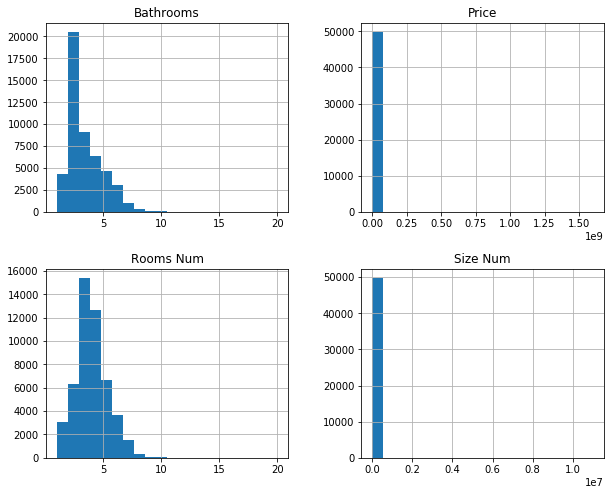

In [199]:
properties_cleaned.hist(bins=20, figsize=(10,8))

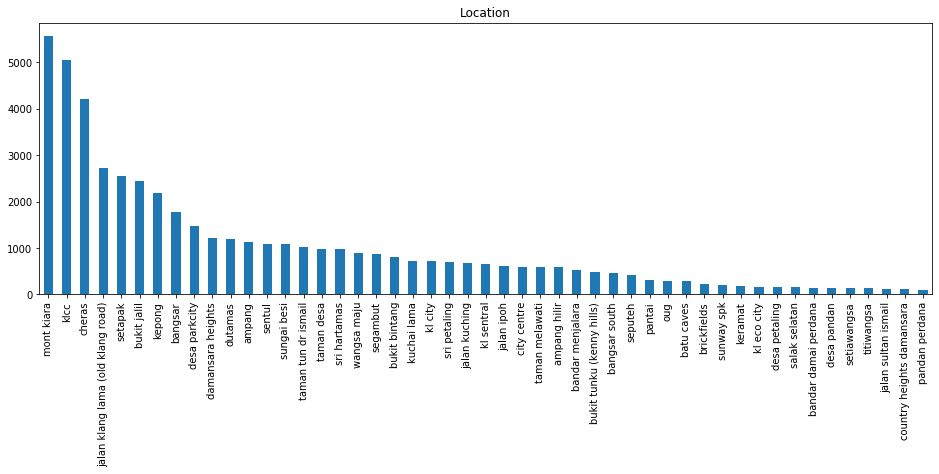

In [200]:
properties_cleaned['Location'].value_counts().plot(kind='bar',figsize=(16,5), title="Location")

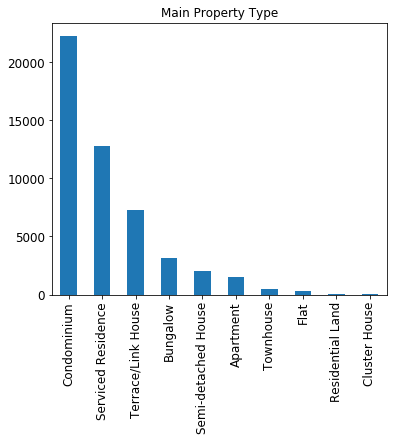

In [201]:
properties_cleaned['Main Property Type'].value_counts().plot(kind='bar',figsize=(6,5), fontsize=12, title="Main Property Type")

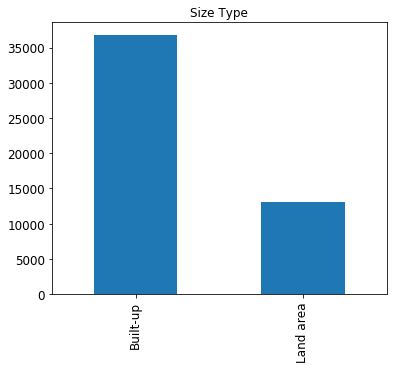

In [202]:
properties_cleaned['Size Type'].value_counts().plot(kind='bar',figsize=(6,5), fontsize=12, title="Size Type")

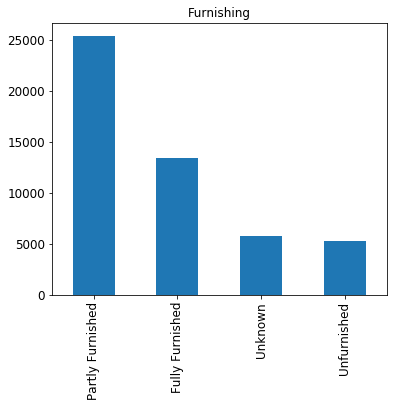

In [203]:
properties_cleaned['Furnishing'].value_counts().plot(kind='bar',figsize=(6,5), fontsize=12, title="Furnishing")

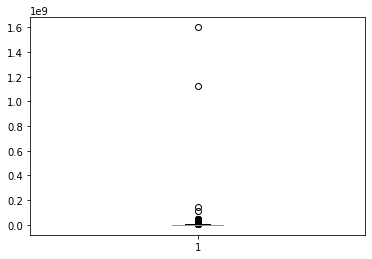

In [204]:
plt.boxplot(properties_cleaned["Price"])
plt.show()

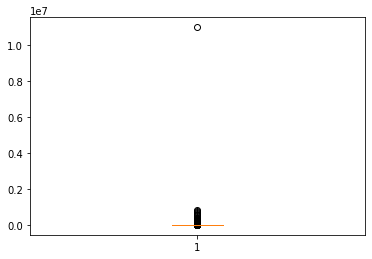

In [205]:
plt.boxplot(properties_cleaned["Size Num"])
plt.show()

In [206]:
properties_cleaned['Size Num'].value_counts()

1650     928
1400     597
1100     582
950      519
1760     507
1200     507
850      380
1500     371
1300     355
3200     346
1800     317
1600     302
1540     294
4000     259
1870     256
880      254
1313     239
1076     234
1000     222
935      221
3600     216
1430     215
2400     210
3000     207
650      204
1250     202
800      202
1087     201
1050     196
900      182
        ... 
1922       1
3939       1
9791       1
3770       1
5952       1
3875       1
14141      1
3930       1
1915       1
3994       1
6207       1
4734       1
7329       1
2877       1
508        1
3610       1
2397       1
4446       1
9670       1
2429       1
13700      1
2557       1
6943       1
8536       1
14875      1
1282       1
7425       1
2781       1
9414       1
6141       1
Name: Size Num, Length: 3710, dtype: int64

In [207]:
min_price_threshold = 30_000 
max_price_threshold = 15_000_000 

properties_cleaned = properties_cleaned.loc[properties_cleaned['Price'] >= min_price_threshold]
properties_cleaned = properties_cleaned.loc[properties_cleaned['Price'] <= max_price_threshold]

max_size_threshold = 15_000 
min_size_threshold = 200

properties_cleaned = properties_cleaned.loc[properties_cleaned['Size Num'] >= min_size_threshold]
properties_cleaned = properties_cleaned.loc[properties_cleaned['Size Num'] <= max_size_threshold]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa93eeaa048>,
      dtype=object)

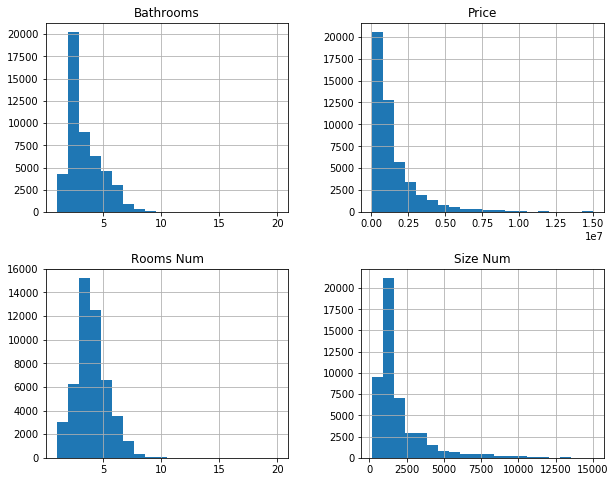

In [208]:
properties_cleaned.hist(bins=20, figsize=(10,8))

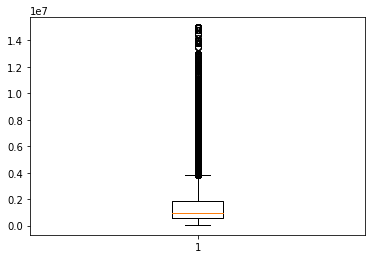

In [209]:
plt.boxplot(properties_cleaned["Price"])
plt.show()

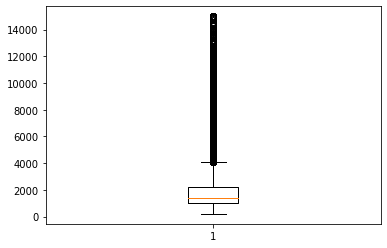

In [210]:
plt.boxplot(properties_cleaned["Size Num"])
plt.show()

In [211]:
properties_cleaned.count()

Location              48978
Price                 48978
Rooms Num             48978
Bathrooms             48978
Main Property Type    48978
Size Type             48978
Size Num              48978
Furnishing            48978
dtype: int64

In [212]:
properties_cleaned.isnull().sum()

Location              0
Price                 0
Rooms Num             0
Bathrooms             0
Main Property Type    0
Size Type             0
Size Num              0
Furnishing            0
dtype: int64

In [213]:
properties_cleaned['Rooms Num'] = properties_cleaned['Rooms Num'].astype('Int64')
properties_cleaned['Bathrooms'] = properties_cleaned['Bathrooms'].astype('Int64')
properties_cleaned['Size Num'] = properties_cleaned['Size Num'].astype('Int64')

In [214]:
properties_cleaned.isnull().sum()

Location              0
Price                 0
Rooms Num             0
Bathrooms             0
Main Property Type    0
Size Type             0
Size Num              0
Furnishing            0
dtype: int64

In [215]:
properties_cleaned

,Location,Price,Rooms Num,Bathrooms,Main Property Type,Size Type,Size Num,Furnishing
0,klcc,1250000,3,3,Serviced Residence,Built-up,1335,Fully Furnished
1,damansara heights,6800000,6,7,Bungalow,Land area,6900,Partly Furnished
2,dutamas,1030000,3,4,Condominium,Built-up,1875,Partly Furnished
4,bukit jalil,900000,5,3,Condominium,Built-up,1513,Partly Furnished
5,taman tun dr ismail,5350000,6,5,Bungalow,Land area,7200,Partly Furnished
7,taman tun dr ismail,2600000,5,4,Semi-detached House,Land area,3600,Partly Furnished
8,taman tun dr ismail,1950000,5,4,Terrace/Link House,Land area,1875,Partly Furnished
9,sri petaling,385000,3,2,Apartment,Built-up,904,Partly Furnished
11,taman tun dr ismail,1680000,4,3,Terrace/Link House,Land area,1760,Partly Furnished
12,taman tun dr ismail,1700000,4,3,Terrace/Link House,Land area,1900,Partly Furnished


In [216]:
properties_cleaned.count()

Location              48978
Price                 48978
Rooms Num             48978
Bathrooms             48978
Main Property Type    48978
Size Type             48978
Size Num              48978
Furnishing            48978
dtype: int64

In [218]:
properties_cleaned.to_csv("/Users/nicoladisabato/Desktop/final_properties_listings.csv")